### 0. Getting the Data Handy

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
from sklearn.ensemble import IsolationForest 

In [11]:
file_dir = "C:/Users/Akanksha/Flight_Price_Prediction/data"

def read_data(name):
    filename = f"{file_dir}/{name}.csv"
    return pd.read_csv(filename)
    
train_data = read_data("train")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,SpiceJet,2019-05-24,Banglore,Delhi,21:10:00,00:05:00,175.0,0,No Info,3971
1,IndiGo,2019-04-12,Banglore,Delhi,18:55:00,21:50:00,175.0,0,No Info,5780
2,IndiGo,2019-05-03,Chennai,Kolkata,11:35:00,14:00:00,145.0,0,No Info,4332
3,Multiple Carriers,2019-06-27,Delhi,Cochin,07:00:00,19:00:00,720.0,1,No Info,12192
4,Jet Airways,2019-05-21,Kolkata,Banglore,06:30:00,16:20:00,590.0,1,No Info,14781


In [12]:
train_data.shape

(6694, 10)

In [13]:
train_data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Dep_Time            object
Arrival_Time        object
Duration           float64
Total_Stops          int64
Additional_Info     object
Price                int64
dtype: object

In [14]:
train_data = train_data.assign(**{
                col : pd.to_datetime(train_data.loc[:,col], format='mixed') 
                for col in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']
            })

In [15]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                  float64
Total_Stops                 int64
Additional_Info            object
Price                       int64
dtype: object

### 1. DESCRIPTIVE STATISTICS

#### 1.1 Measures of Location (Mean, Median, Mode, Percentiles, Qyartiles)

In [16]:
skim(train_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6694   │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 10     │ │ datetime64  │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ Duration        │    0 │      0 │    630 │    500 │     75 │    170 │    510 │     910 │    2900 │  ▇▅▂▁   │  │
│ │ Total_Stops     │    0 │      0 │    0.8 │   0.66 │      0 │      0 │      1 │       1 │       4 │  ▅▇ ▂   │  │
│ │ Price           │    0 │      0 │   9100 │   4600 │   1800 │   5200 │   8400 │   12000 │   57000 │   ▇▃    │  │
│ └─────────────────┴──────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┴─────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %   ┃ first                     ┃ last                      ┃ frequency   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ Date_of_Journey      │    0 │      0 │        2019-03-01         │        2019-06-27         │ None        │  │
│ │ Dep_Time             │    0 │      0 │    2024-07-24 00:20:00    │    2024-07-24 23:55:00    │ None        │  │
│ │ Arrival_Time         │    0 │      0 │    2024-07-24 00:05:00    │    2024-07-24 23:55:00    │ None        │  │
│ └──────────────────────┴──────┴────────┴───────────────────────────┴───────────────────────────┴─────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Airline                         │      0 │          0 │                        1.7 │                 11130 │  │
│ │ Source                          │      0 │          0 │                          1 │                  6694 │  │
│ │ Destination                     │      0 │          0 │                        1.1 │                  7267 │  │
│ │ Additional_Info                 │      0 │          0 │                        2.4 │                 16260 │  │
│ └─────────────────────────────────┴────────┴──────────

In [17]:
train_data.describe(include="number") #only numeric columns

,Duration,Total_Stops,Price
count,6694.000000,6694.000000,6694.000000
mean,628.782492,0.801613,9069.414999
std,498.496788,0.657627,4589.251255
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5229.000000
50%,510.000000,1.000000,8366.000000
75%,910.000000,1.000000,12373.000000
max,2860.000000,4.000000,57209.000000


In [18]:
train_data.describe(include='O')

,Airline,Source,Destination,Additional_Info
count,6694,6694,6694,6694
unique,9,5,6,9
top,Jet Airways,Delhi,Cochin,No Info
freq,2382,2779,2779,5241


In [21]:
(
    train_data
    .assign(Total_Stops = train_data['Total_Stops'].astype('object'))
    #.describe(include='category')
    .describe(include='O')
)

,Airline,Source,Destination,Total_Stops,Additional_Info
count,6694,6694,6694,6694,6694
unique,9,5,6,5,9
top,Jet Airways,Delhi,Cochin,1,No Info
freq,2382,2779,2779,3616,5241


In [25]:
forest = IsolationForest(n_estimators = 100, random_state=37)

In [26]:
(
    train_data
    .assign(
        outlier = forest.fit_predict(train_data
                                     .drop(columns='Price')
                                     .select_dtypes(include='number')))
    .query("outlier == -1")
    )

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,outlier
2,IndiGo,2019-05-03,Chennai,Kolkata,2024-07-24 11:35:00,2024-07-24 14:00:00,145.0,0,No Info,4332,-1
5,Jet Airways,2019-05-06,Kolkata,Banglore,2024-07-24 09:35:00,2024-07-24 09:45:00,1450.0,1,In-flight meal not included,8066,-1
6,Jet Airways,2019-03-27,Delhi,Cochin,2024-07-24 17:35:00,2024-07-24 04:25:00,650.0,2,In-flight meal not included,9412,-1
7,Jet Airways,2019-04-12,Banglore,Delhi,2024-07-24 18:55:00,2024-07-24 22:00:00,185.0,0,No Info,7229,-1
11,IndiGo,2019-03-27,Mumbai,Hyderabad,2024-07-24 12:00:00,2024-07-24 13:25:00,85.0,0,No Info,2754,-1
...,...,...,...,...,...,...,...,...,...,...,...
6677,Vistara,2019-04-01,Kolkata,Banglore,2024-07-24 20:20:00,2024-07-24 18:50:00,1350.0,1,No Info,7927,-1
6678,SpiceJet,2019-06-21,Kolkata,Banglore,2024-07-24 09:00:00,2024-07-24 11:25:00,145.0,0,No check-in baggage included,3841,-1
6680,Jet Airways,2019-05-24,Kolkata,Banglore,2024-07-24 18:55:00,2024-07-24 12:00:00,1025.0,1,In-flight meal not included,10844,-1
6684,Jet Airways,2019-05-18,Kolkata,Banglore,2024-07-24 14:05:00,2024-07-24 12:00:00,1315.0,1,No Info,14388,-1


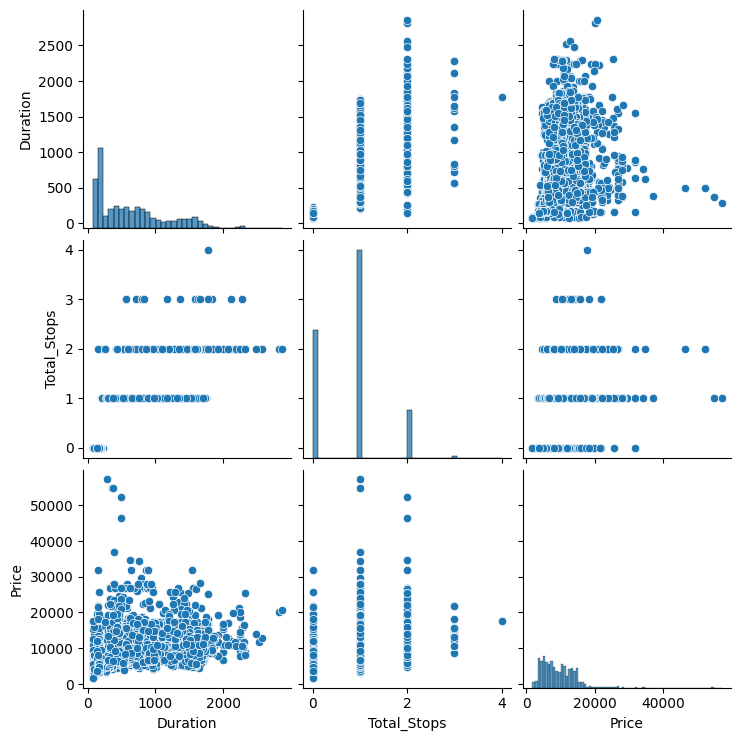

In [32]:
sns.pairplot(train_data.select_dtypes(include='number'))#, corner=True)

In [34]:
cm = train_data.corr(method='spearman', numeric_only=True)
cm

,Duration,Total_Stops,Price
Duration,1.000000,0.817539,0.687579
Total_Stops,0.817539,1.000000,0.711489
Price,0.687579,0.711489,1.000000


<Axes: >

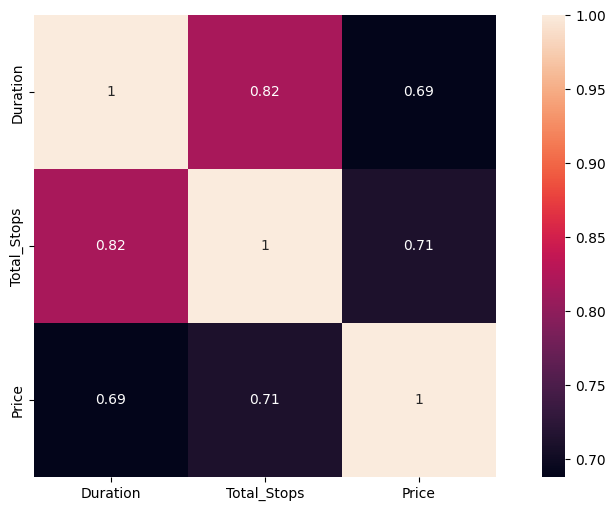

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(cm, annot=True, 
            annot_kws={"size": 10}, 
            square=True, 
            ax=ax)

In [42]:
from scipy import stats

def cramers_v(data, var1, var2):
  ct = pd.crosstab(
      data.loc[:, var1],
      data.loc[:, var2]
  )
  r, c = ct.shape
  n = ct.sum().sum()
  chi2 = stats.chi2_contingency(ct).statistic
  phi2 = chi2 / n

  # bias correction
  phi2_ = max(0, phi2 - ((r - 1) * (c - 1) / (n - 1)))
  r_ = r - (((r - 1) ** 2) / (n - 1))
  c_ = c - (((c - 1) ** 2) / (n - 1))

  return np.sqrt(phi2_ / min(r_ - 1, c_ - 1))


def cramersV_heatmap(data, figsize=(12, 6), cmap="Blues"):
  cols = data.select_dtypes(include="O").columns.to_list()

  matrix = (
      pd
      .DataFrame(data=np.ones((len(cols), len(cols))))
      .set_axis(cols, axis=0)
      .set_axis(cols, axis=1)
  )

  for col1 in cols:
    for col2 in cols:
      if col1 != col2:
        matrix.loc[col1, col2] = cramers_v(data, col1, col2)

  mask = np.zeros_like(matrix, dtype=bool)
  mask[np.triu_indices_from(mask)] = True
  
  fig, ax = plt.subplots(figsize=figsize)
  hm = sns.heatmap(
      matrix,
      vmin=0,
      vmax=1,
      cmap=cmap,
      annot=True,
      fmt=".2f",
      square=True,
      linewidths=1.5,
      mask=mask,
      ax=ax
  )
  ax.set(title="Cramer's V Correlation Matrix Heatmap")

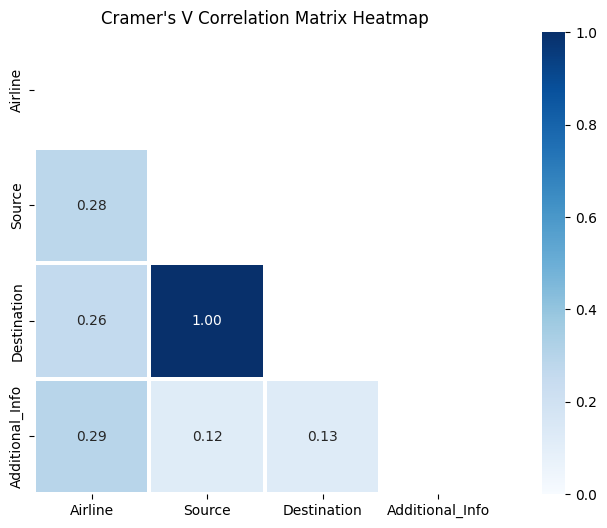

In [43]:
cramersV_heatmap(train_data)

#### In-depth Analysis for each column

In [45]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

In [51]:
from IPython.display import display, HTML

def display_html(size=3, content="content"):
    display(HTML(f"<h{size}>{content}</h{size}>"))

In [55]:
import eda_helper_functions

1. Airline

In [59]:
eda_helper_functions.cat_summary(train_data, 'Airline')

0                SpiceJet
1                  IndiGo
2                  IndiGo
3       Multiple Carriers
4             Jet Airways
              ...        
6689               IndiGo
6690               IndiGo
6691                GoAir
6692             SpiceJet
6693               IndiGo
Name: Airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,9
top,Jet Airways
freq,2382


,count,percentage
category,,
Jet Airways,2382,0.355841
IndiGo,1295,0.193457
Air India,1076,0.160741
Multiple Carriers,773,0.115477
SpiceJet,531,0.079325
Vistara,317,0.047356
Air Asia,205,0.030624
GoAir,114,0.017030
Trujet,1,0.000149


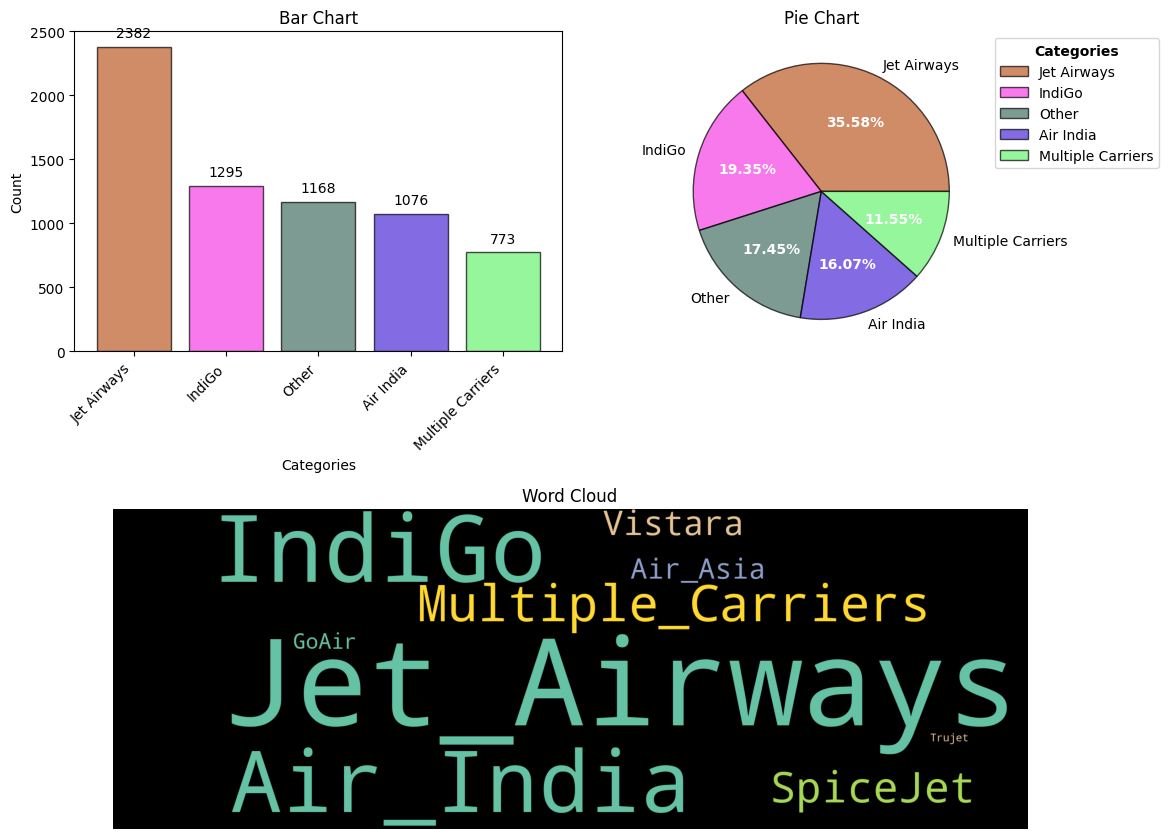

In [61]:
eda_helper_functions.cat_univar_plots(train_data, 'Airline', k=4)

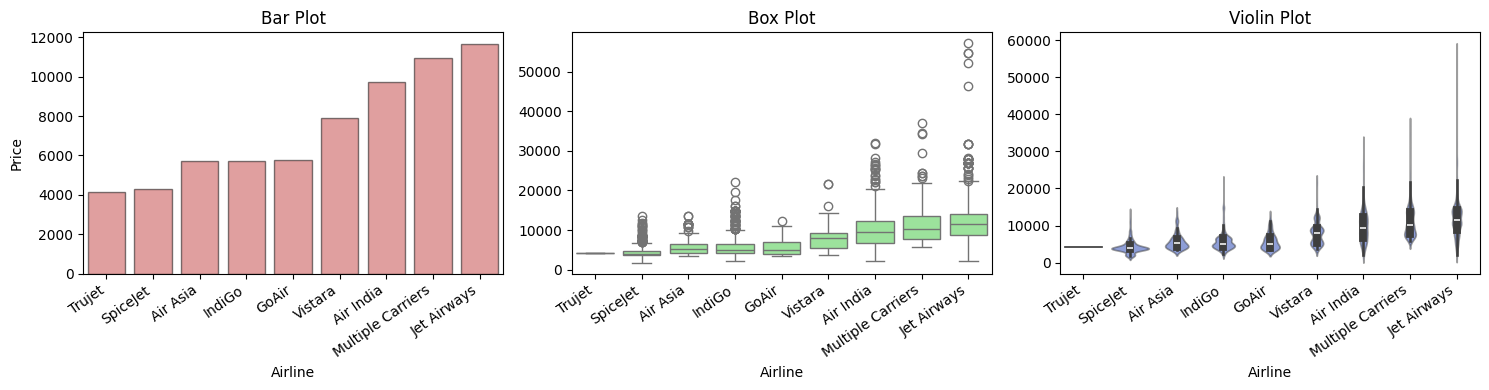

In [63]:
eda_helper_functions.num_cat_bivar_plots(train_data, 'Price', 'Airline')

In [64]:
eda_helper_functions.num_cat_hyp_testing(train_data, 'Price', 'Airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 457.4287935095814
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Price and Airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3011.011116788641
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Price and Airline are associated to each other


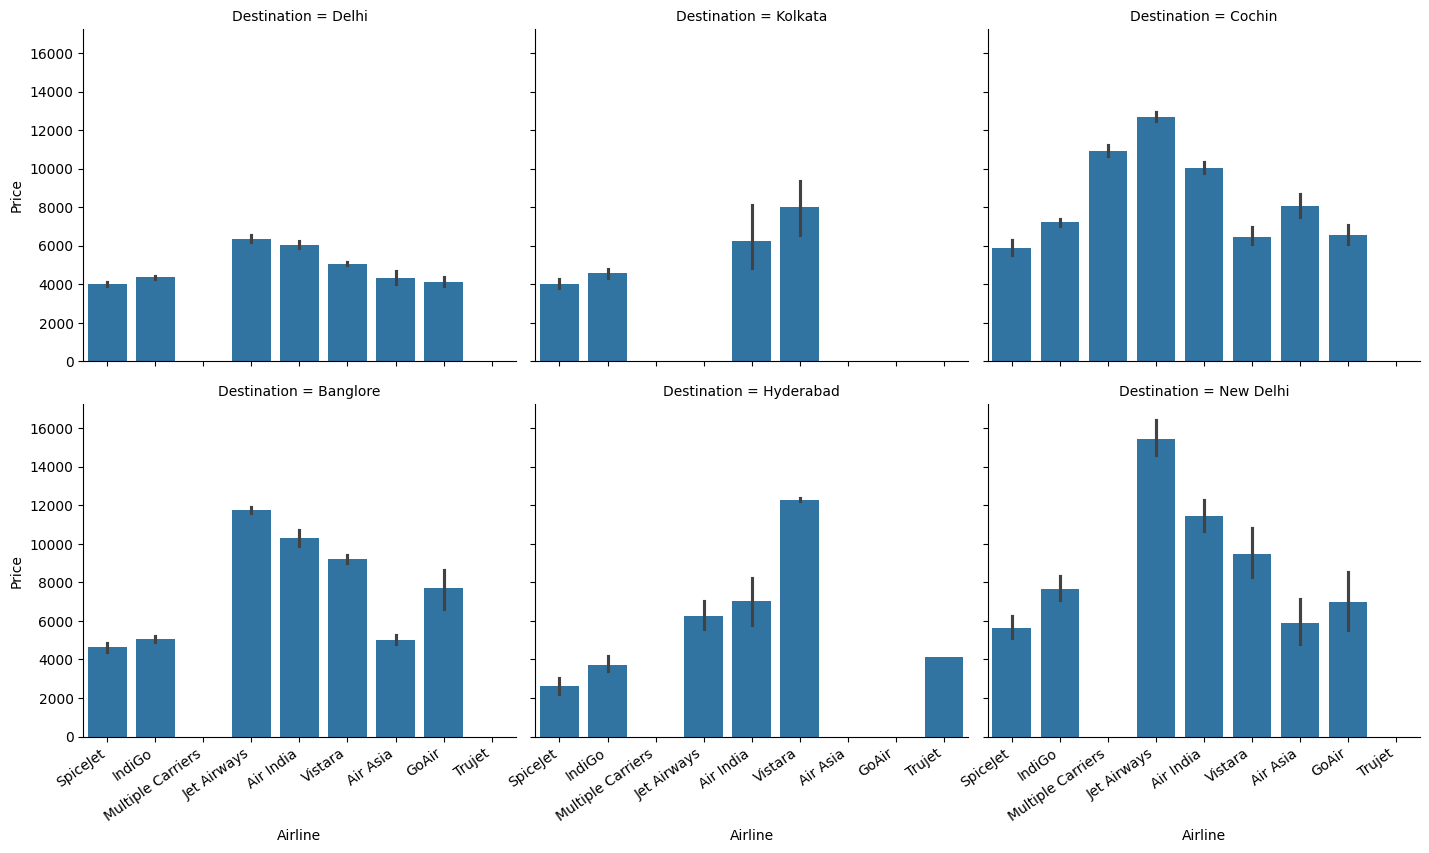

In [69]:
airline_grid = sns.FacetGrid(
    train_data,
    col='Destination',
    height = 4,
    aspect = 1.2,
    sharey= True,
    col_wrap=3
)

airline_grid.map(sns.barplot, "Airline", "Price", order=train_data.Airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

2. Date_of_Journey

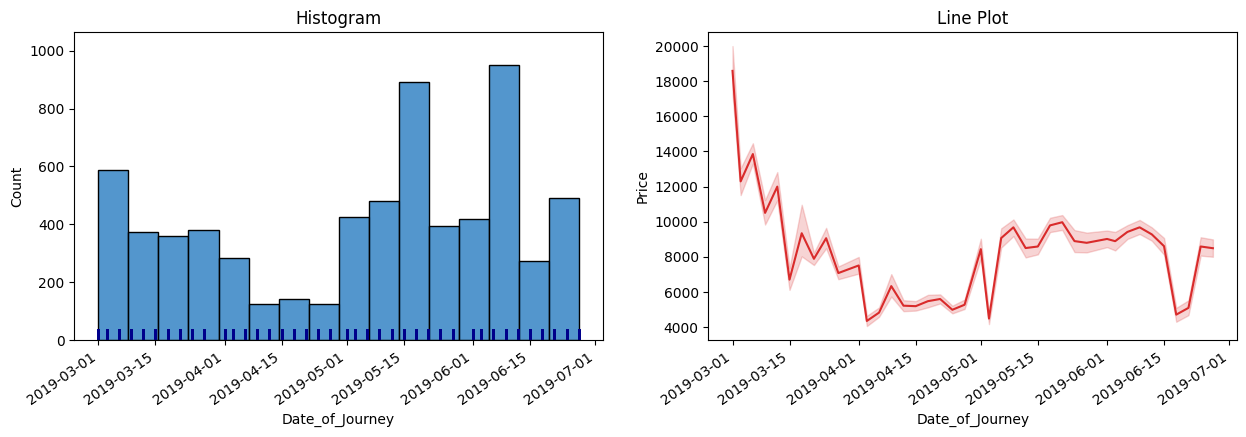

In [70]:
eda_helper_functions.dt_univar_plots(train_data, 'Date_of_Journey', 'Price')

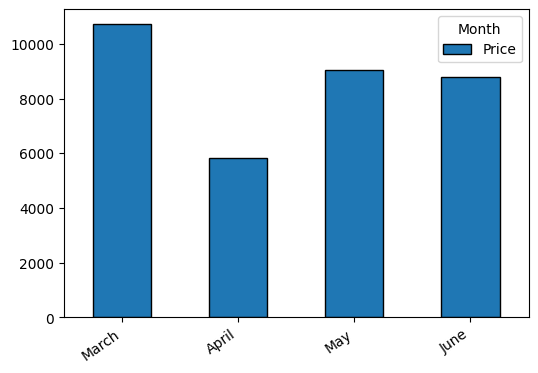

In [78]:
(
    train_data
    .groupby(pd.Grouper(key='Date_of_Journey', freq='M'))
    .Price.mean()
    .to_frame()
    .set_axis(['March', 'April', 'May', 'June'], axis=0)
    .rename_axis('Month', axis=1)
    .plot(
        kind='bar',
        figsize=(6,4),
        edgecolor='black'
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

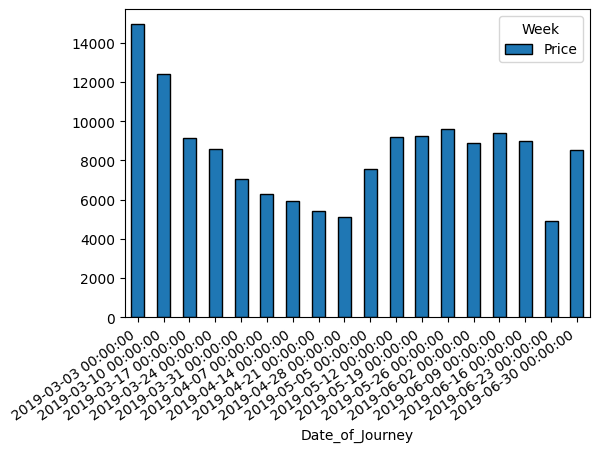

In [82]:
(
    train_data
    .groupby(pd.Grouper(key='Date_of_Journey', freq='W'))
    .Price.mean()
    .to_frame()
    #.set_axis(['March', 'April', 'May', 'June'], axis=0)
    .rename_axis('Week', axis=1)
    .plot(
        kind='bar',
        figsize=(6,4),
        edgecolor='black'
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

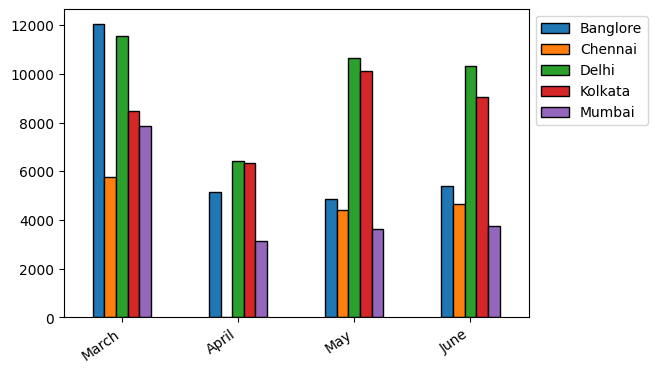

In [97]:
(
    train_data
    .groupby([pd.Grouper(key='Date_of_Journey', freq='M'), 'Source'])
    .Price.mean()
    .unstack(fill_value=0)
    .set_axis(['March', 'April', 'May', 'June'], axis=0)
    .rename_axis('Month', axis=1)
    .plot(
        kind='bar',
        figsize=(6,4),
        edgecolor='black'
    )
)

ax = plt.gca()

ax.legend(
    loc='upper left',
    bbox_to_anchor=(1,1)
)
eda_helper_functions.rotate_xlabels(ax)

3. Dep_Time

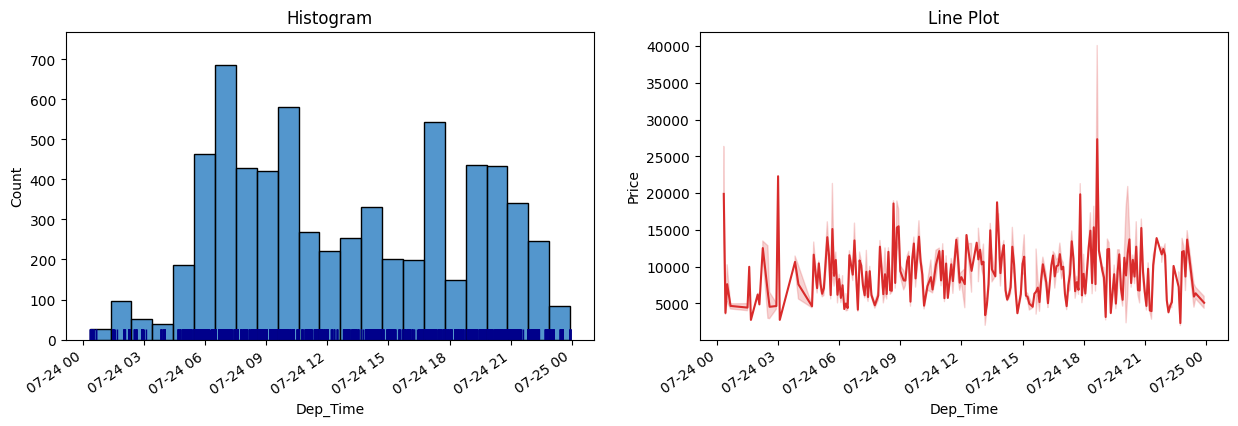

In [99]:
eda_helper_functions.dt_univar_plots(train_data, 'Dep_Time', 'Price')

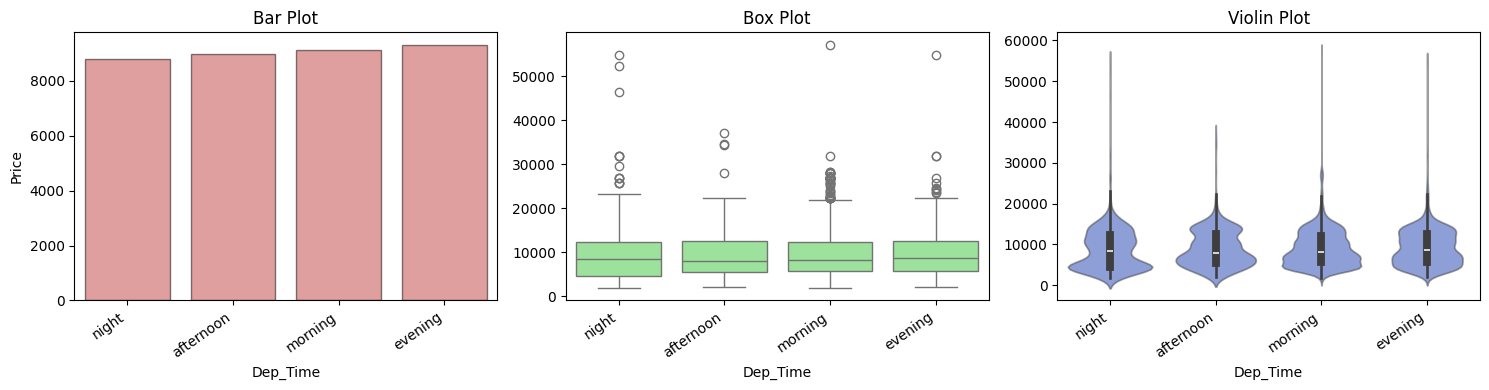

In [114]:
(
    train_data
    .assign(Dep_Time = lambda df_: (
        np.select(
                [df_.Dep_Time.dt.hour.between(4,12, inclusive='left'), 
                df_.Dep_Time.dt.hour.between(12,16, inclusive='left'), 
                df_.Dep_Time.dt.hour.between(16,20, inclusive='left'),
                ],
                ['morning', 'afternoon', 'evening'],
                default='night')
        )
    )
    #.pipe(eda_helper_functions.cat_univar_plots, 'Dep_Time')
    .pipe(eda_helper_functions.num_cat_bivar_plots, 'Price', 'Dep_Time')
)

4. Duration

In [116]:
eda_helper_functions.num_summary(train_data, 'Duration')

0       175.0
1       175.0
2       145.0
3       720.0
4       590.0
        ...  
6689    170.0
6690    300.0
6691    370.0
6692    140.0
6693    975.0
Name: Duration, Length: 6694, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,510.00
75,910.00
90,1435.00
95,1600.00
99,1841.05


,value
mean,628.782492
trimmed mean (5%),594.874710
trimmed mean (10%),565.897125
median,510.000000


,value
var,248499.047857
std,498.496788
IQR,740.000000
mad,340.000000
coef_variance,0.792797


,value
skewness,0.916560
kurtosis,0.029524


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 6.790062550479478e-57
Test Statistic       : 0.8863197355241337
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 245.68510419248378
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


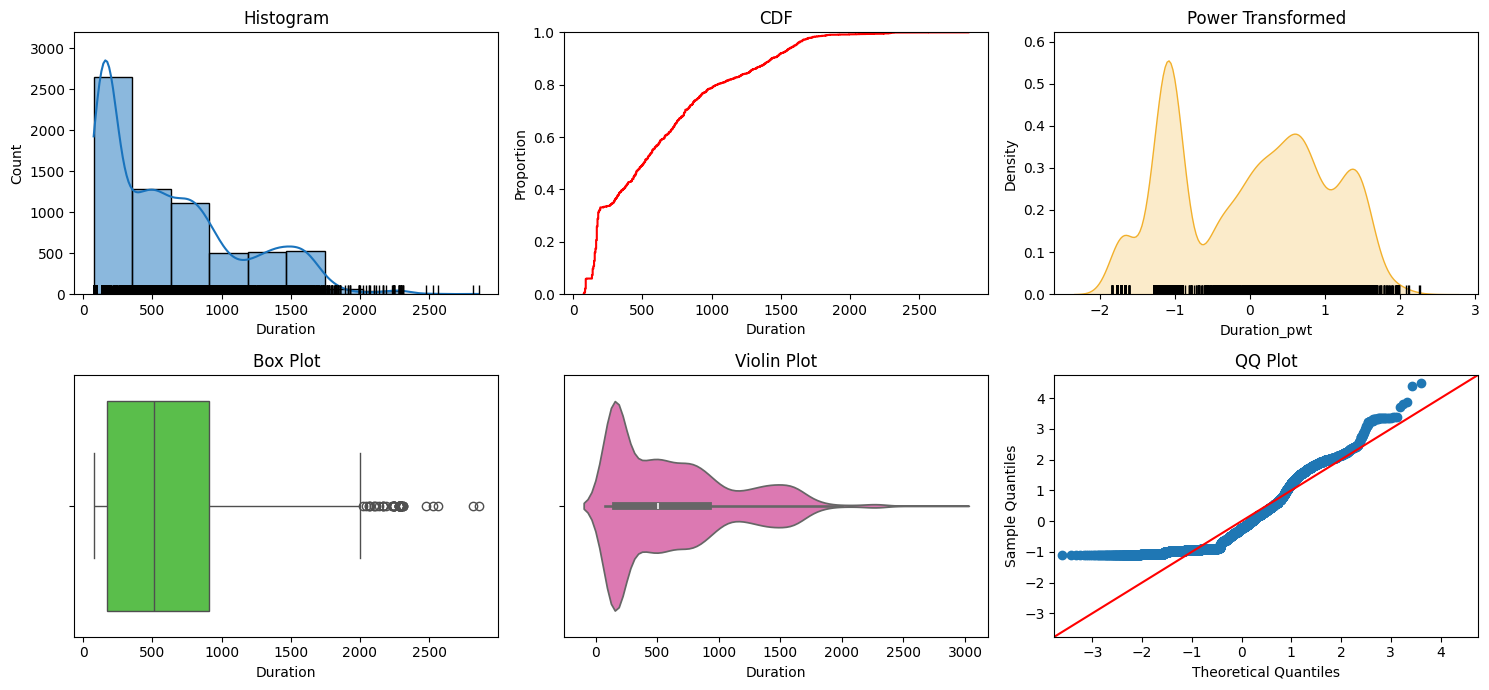

In [115]:
eda_helper_functions.num_univar_plots(train_data, 'Duration')

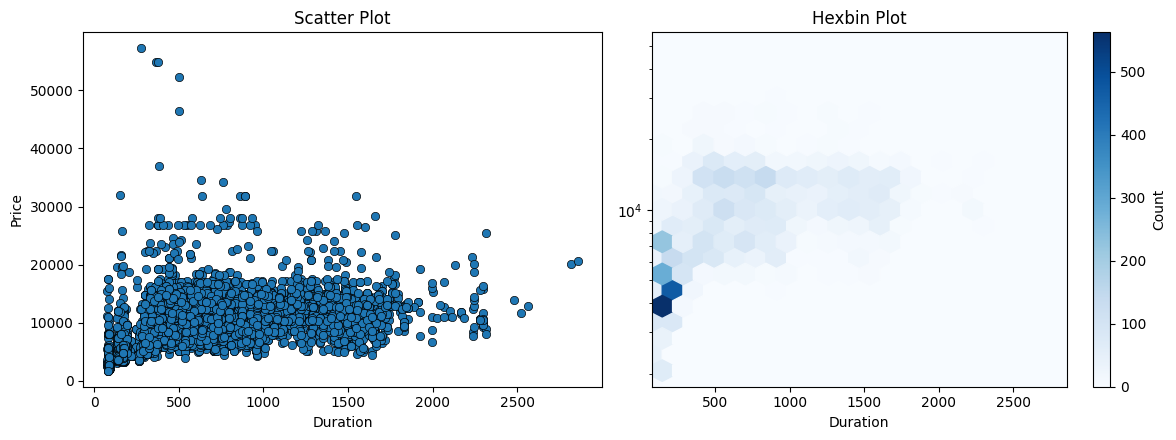

In [122]:
eda_helper_functions.num_bivar_plots(train_data, 'Duration', 'Price',
                                     hexbin_kwargs=dict(
                                         yscale='log',
                                         gridsize=20,
                                         cmap='Blues'
                                     ))

In [120]:
eda_helper_functions.num_num_hyp_testing(train_data, 'Duration', 'Price')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5056437073898129
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Duration and Price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6875793435887813
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables Duration and Price are correlated


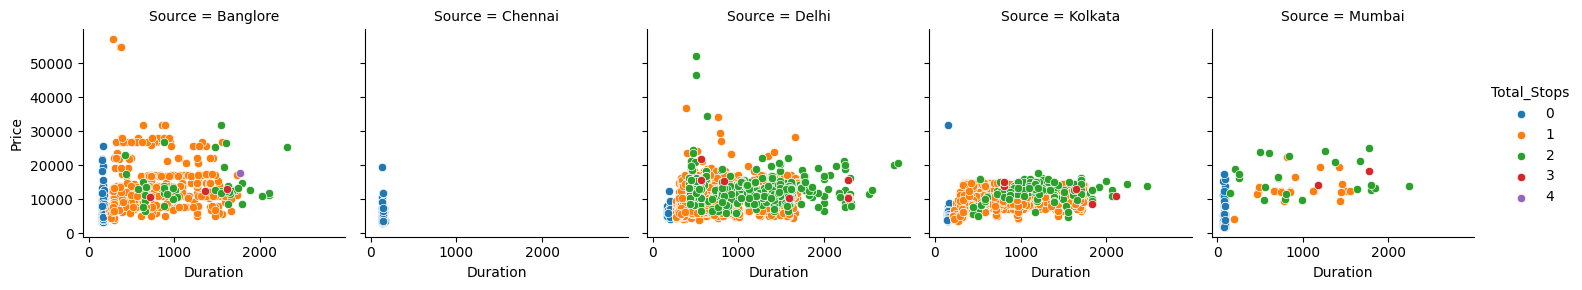

In [127]:
duration_grid = sns.FacetGrid(
    train_data,
    col='Source',
    hue='Total_Stops',
    sharey=True
)

duration_grid.map(sns.scatterplot, "Duration", "Price")
duration_grid.add_legend()

In [133]:
eda_helper_functions.get_iqr_outliers(train_data, 'Duration')

Lower Limit : -940.0
Upper Limit : 2020.0


,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4823,Air India,2019-03-18,Banglore,New Delhi,2024-07-24 06:45:00,2024-07-24 16:30:00,2025.0,2,No Info,10835
2536,Jet Airways,2019-03-21,Delhi,Cochin,2024-07-24 18:20:00,2024-07-24 04:25:00,2045.0,2,No Info,13082
5951,Air India,2019-05-01,Kolkata,Banglore,2024-07-24 05:50:00,2024-07-24 16:15:00,2065.0,2,No Info,10991
1122,Air India,2019-05-15,Kolkata,Banglore,2024-07-24 05:50:00,2024-07-24 16:15:00,2065.0,2,No Info,12723
3260,Jet Airways,2019-03-06,Delhi,Cochin,2024-07-24 17:55:00,2024-07-24 04:25:00,2070.0,2,No Info,17072
2502,Air India,2019-03-03,Banglore,New Delhi,2024-07-24 11:05:00,2024-07-24 22:10:00,2105.0,2,No Info,11948
1935,Air India,2019-03-18,Banglore,New Delhi,2024-07-24 11:05:00,2024-07-24 22:10:00,2105.0,2,No Info,11161
2622,Air India,2019-05-12,Kolkata,Banglore,2024-07-24 12:00:00,2024-07-24 23:15:00,2115.0,3,No Info,10991
4621,Jet Airways,2019-03-06,Delhi,Cochin,2024-07-24 16:50:00,2024-07-24 04:25:00,2135.0,2,No Info,19907
3027,Air India,2019-03-09,Delhi,Cochin,2024-07-24 07:05:00,2024-07-24 19:15:00,2170.0,2,No Info,11762


In [128]:
from ydata_profiling import ProfileReport

In [132]:
report = ProfileReport(train_data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [131]:
report.to_file('report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [134]:
import dtale
d_report = dtale.show(train_data)
d_report